<a href="https://colab.research.google.com/github/birkenkrahe/notebooksf21/blob/main/Data_import_solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data import with R
The main purpose of this practice sheet is to practice what you've learnt in the [DataCamp assignment](https://campus.datacamp.com/courses/introduction-to-importing-data-in-r/importing-data-from-flat-files-with-utils?ex=1).

Along the way, we're going to repeat some R commands and add a little more I/O information.

## Uploading files

* Download the files `hotdogs.txt` and `swimming_pools.csv` from GitHub (in [`/tests/data/`](https://github.com/birkenkrahe/dsc101/tree/main/tests/data)) to your computer.
* To do this, open the files as `Raw` files and save them (with right-click) as `.txt` and `.csv` files, respectively.
* Enter the command to find out in which R working directory you currently are.

In [ ]:
getwd()

[1] "/content"

## Notebook navigation

- Open the folder symbol in the left sidebar. It only shows the contents of the current folder, `sample_data`. 
- In the sidebar, right click on the symbol above `sample_data` and create a `New folder` named `practice`. 
- Navigate to the next higher folder by clicking on the symbol right above the folder `sample_data`.

You are now looking at a complete Linux file server tree. On Unix-like systems (Linux, MacOS), file paths are separated by forward slashes `/`, while Windows uses backward slashes `\`. Data uploaded anywhere but in `/content` are deleted whenever the connection to your session is severed.

- You should see the folder `practice` that you created inside `content`. 
- Right-click on `practice` and choose `Upload`.
- Upload the files `hotdogs.txt` and `swimming_pools.csv` to `practice`.

Image: how your notebook sidebar should look now:
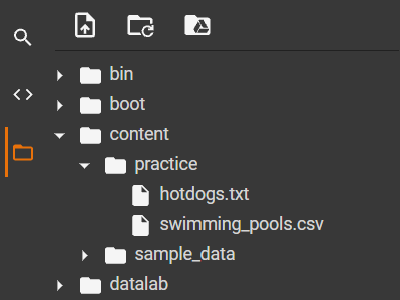

Enter the command to change the working directory to `/practice`. 

*Tip: You need the absolute path for that.*

In [ ]:
setwd("/content/practice")

Enter the command to show that you are in fact in the folder `/practice`.

In [ ]:
getwd()

[1] "/content/practice"

*Bonus question: print the full path to the file `hotdogs.txt` as a `character` using the function `file.path()`.*

In [ ]:
file.path("/content", "/practice", "hotdogs.txt")

[1] "/content//practice/hotdogs.txt"

## Finding files

Find the files in `/practice`: you can see in the sidebar that they're there. Enter a command that will print the file names.

In [ ]:
dir() # the function list.files() would also work here

[1] "hotdogs.txt"        "swimming_pools.csv"

In [ ]:
list.files()

[1] "hotdogs.txt"        "swimming_pools.csv"

Show the structure of the object you just created.

In [ ]:
d <- dir()
str(d)

 chr [1:2] "hotdogs.txt" "swimming_pools.csv"


What kind of data structure is this? Write the complete technical name for this object in the text box below:

**ANSWER: `dir()` creates** a `character` vector of two elements. Each element is the name of a file in the current working directory `getwd()`.

## Loading text files
Take a look at the text file `hotdogs.txt`, and import it as a data frame named `hotdogs`.

In [ ]:
hotdogs <- read.delim(file = "hotdogs.txt", header=FALSE)

Print the first few lines of `hotdogs`.

In [ ]:
head(hotdogs)

,V1,V2,V3
,<chr>,<int>,<int>
1,Beef,186,495
2,Beef,181,477
3,Beef,176,425
4,Beef,149,322
5,Beef,184,482
6,Beef,190,587


Verify that `hotdogs` is a data frame so that the answer is a `logical` constant.

In [ ]:
is.data.frame(hotdogs)

[1] TRUE

Take a look at the first few lines of the file `swimming_pools.csv`. Take note of the header, and import it as a data frame `pools` using the following command in the code cell below:
```
read.csv2(file="swimming_pools.csv,header=TRUE)
```

In [ ]:
pools <- read.csv2(file="swimming_pools.csv",header=TRUE)

Check the structure of `pools` to make sure that you have what you expected: two `character` columns (`Name` and `Address` of the pool), and two `numeric` columns (`Latitude` and `Longitude` of the pool's location).

In [ ]:
str(pools)

'data.frame':	20 obs. of  1 variable:
 $ Name.Address.Latitude.Longitude: chr  "Acacia Ridge Leisure Centre,1391 Beaudesert Road, Acacia Ridge,-27.58616,153.026354" "Bellbowrie Pool,Sugarwood Street, Bellbowrie,-27.565466,152.891082" "Carole Park,Cnr Boundary Road and Waterford Road Wacol,-27.607439,152.931511" "Centenary Pool (inner City),400 Gregory Terrace, Spring Hill,-27.455369,153.025067" ...


Evidently, we made a mistake. Can you find it and fix it? Put the correct command to import `swimming_pools.csv` in the code cell below.

*Tip: take a look at the help page for `read.table()`.*

In [ ]:
pools <- read.csv(file="swimming_pools.csv",header=TRUE)

In [ ]:
str(pools)

'data.frame':	20 obs. of  4 variables:
 $ Name     : chr  "Acacia Ridge Leisure Centre" "Bellbowrie Pool" "Carole Park" "Centenary Pool (inner City)" ...
 $ Address  : chr  "1391 Beaudesert Road, Acacia Ridge" "Sugarwood Street, Bellbowrie" "Cnr Boundary Road and Waterford Road Wacol" "400 Gregory Terrace, Spring Hill" ...
 $ Latitude : num  -27.6 -27.6 -27.6 -27.5 -27.4 ...
 $ Longitude: num  153 153 153 153 153 ...


## Naming data frame vectors

What are the `names` of the `hotdog` dataframe column vectors?

In [38]:
names(hotdogs)

[1] "V1" "V2" "V3"

The original `hotdogs.txt` data are the results of a laboratory analysis of calories and sodium content of major hot dog brands (UCLA, 2008).

Rename the column vectors of `hotdogs` to `Type`, `Calories` and `Sodium` in this order - without re-importing the file (as in the DataCamp assignment).

Instead, use the fact that the names of the column vectors are stored in a `character` vector.

In [39]:
names(hotdogs) <- c("Type","Calories","Sodium")

Check the data frame by printing out its structure.

In [40]:
str(hotdogs)

'data.frame':	54 obs. of  3 variables:
 $ Type    : chr  "Beef" "Beef" "Beef" "Beef" ...
 $ Calories: int  186 181 176 149 184 190 158 139 175 148 ...
 $ Sodium  : int  495 477 425 322 482 587 370 322 479 375 ...


## Extract values from the data frame

We can now refer to the column vectors by name, for example `x <- hotdogs$Calories` for all values of that vector, or `x[x<300]` for all hotdogs with less than 300 calories.

How many hotdog types have less than 300 and more than 250 milligrams of sodium? Use the next code cell to determine and print the correct number.

In [90]:
y <- hotdogs$Sodium # store the Sodium values of all hotdogs in y

In [92]:
index <- y < 300 & y > 250 # values of index are TRUE when condition is fulfilled

In [94]:
y1 <- y[index]

In [95]:
length(y1) # length of the subvector

[1] 2

In [97]:
length(which(index))

[1] 2

What `Type` of hotdogs are these? 

*Tip: extract all elements of the vector with the hotdog types that satisfy the (logical) condition of having more than 250 mg and less than 300 mg sodium.*   

In [98]:
hotdogs$Type[y==y1]

[1] "Beef" "Beef"

## Plotting `hotdogs`
This is what you're about to learn in the next few sessions. For now, just follow the instructions.

Assign the `Calories` vector to an object `x`.

In [99]:
x <- hotdogs$Calories

Now, `x` contains the hotdog `Calories`, and `y` contains the `Sodium` values. 

Let's plot these: enter `plot(x,y)` in the next code cell:

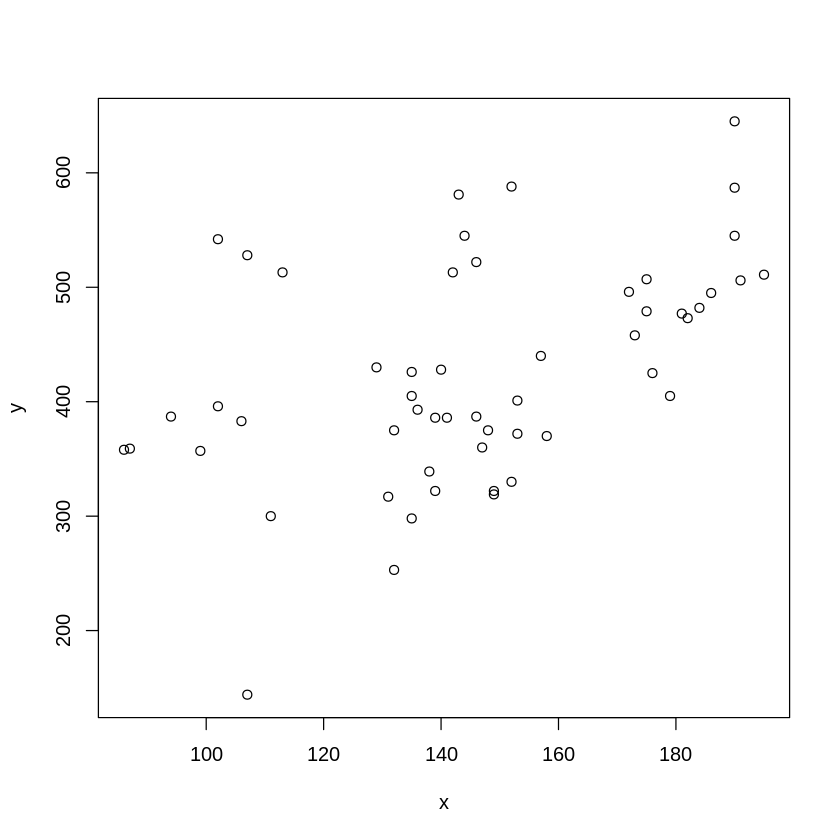

In [100]:
plot(x,y)

If we want to find out how these hotdogs are distributed by type, we need to put the third available variable, `Type`, to use. 

First, put the `Type` of hotdog in another vector named `z`.  

In [101]:
z <- hotdogs$Type

Next, turn `z` into a `factor` - simply overwrite it with a `factor` version of itself.


In [102]:
str(hotdogs)

'data.frame':	54 obs. of  3 variables:
 $ Type    : chr  "Beef" "Beef" "Beef" "Beef" ...
 $ Calories: int  186 181 176 149 184 190 158 139 175 148 ...
 $ Sodium  : int  495 477 425 322 482 587 370 322 479 375 ...


In [103]:
z <- factor(z)

In [104]:
str(z)

 Factor w/ 3 levels "Beef","Meat",..: 1 1 1 1 1 1 1 1 1 1 ...


Now plot the data set again, this time using `z` to color the data points. Enter the following command in the code cell below:
```
plot(x,y,col=z)
```

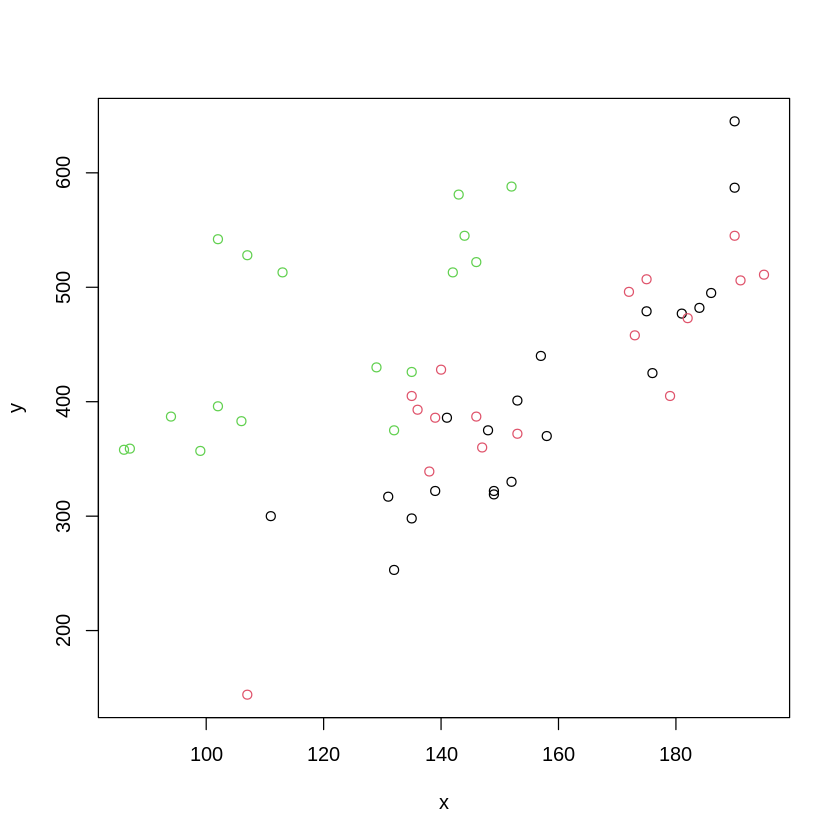

In [107]:
plot(x,y,col=z)

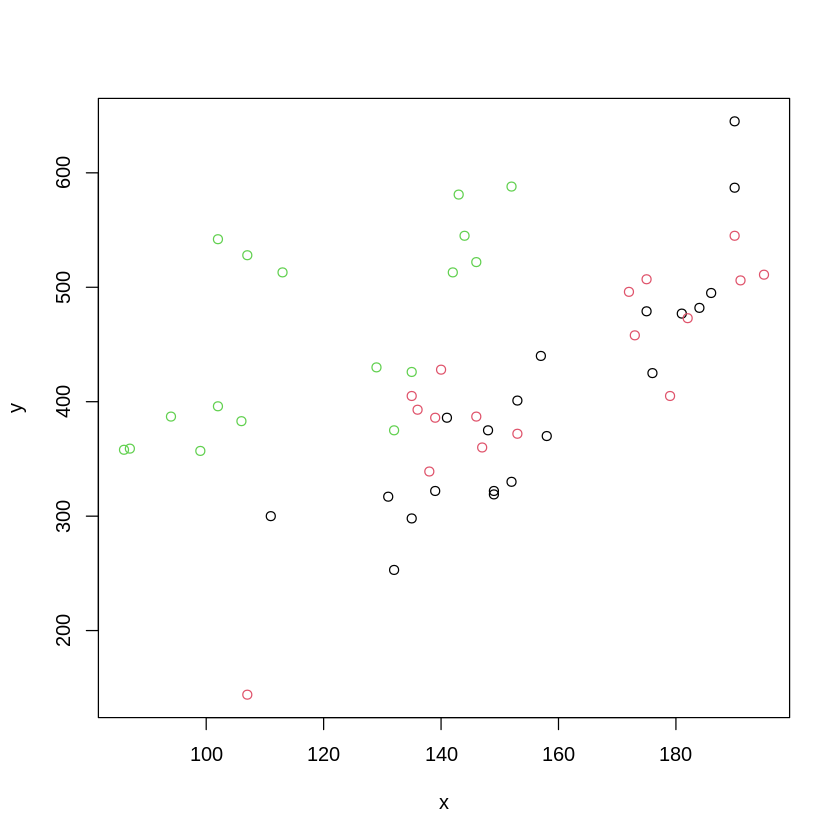

In [113]:
plot(x,y,col=factor(hotdogs$Type))

## Complete Creative Commons reference

The file `swimming_pools.txt` is distributed under a 'Creative Commons' copyright. Check [the origin of the file](https://www.data.brisbane.qld.gov.au/data/dataset/swimming-pools) to find out how to complete the reference below, and complete it accordingly.

## References

Bisong E. (2019) Google Colaboratory. In: Building Machine Learning and Deep Learning Models on Google Cloud Platform. Apress, Berkeley, CA. https://doi.org/10.1007/978-1-4842-4470-8_7

R Core Team (2021). R: A language and environment for statistical computing. R Foundation for Statistical Computing, Vienna, Austria. Online: [www.R-project.org](https://www.r-project.org).

`swimming_pools.csv`: Brisbane City Council swimming pools (29 June 2015). Online: data.brisbane.qld.gov.au. [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/).

`hotdogs.txt`: UCLA (29 Dec 2008). SOCR 012708 ID Data HotDogs (wiki). Online: [wiki.stat.ucla.edu](http://wiki.stat.ucla.edu/socr/index.php/SOCR_012708_ID_Data_HotDogs).